In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
df = pd.read_csv('D:/ESCRITORIO/Github/Road to data science V/Dataset/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [93]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

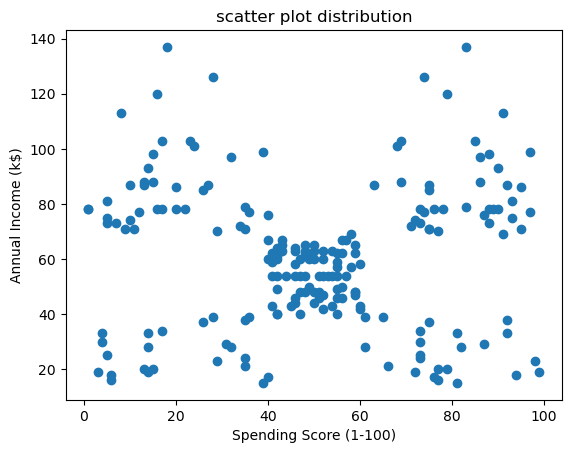

In [14]:
plt.scatter(df["Spending Score (1-100)"] , df["Annual Income (k$)"])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('scatter plot distribution')
plt.show()

In [15]:
from sklearn.cluster import KMeans

In [17]:
km = KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [23]:
y_predicted = km.fit_predict(df[["Spending Score (1-100)","Annual Income (k$)"]])
y_predicted

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [24]:
df1 = df
df1['cluster'] = y_predicted
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,0
197,198,Male,32,126,74,3
198,199,Male,32,137,18,0


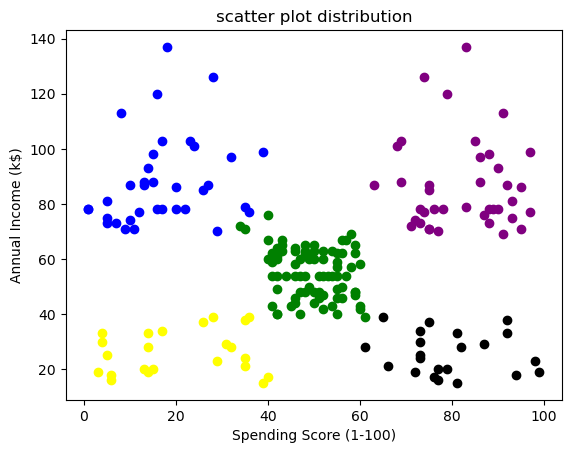

In [38]:
plt.scatter(df1[df1.cluster == 0]['Spending Score (1-100)'] , df1[df1.cluster == 0]['Annual Income (k$)'],color='blue')
plt.scatter(df1[df1.cluster == 1]['Spending Score (1-100)'] , df1[df1.cluster == 1]['Annual Income (k$)'],color='green')
plt.scatter(df1[df1.cluster == 2]['Spending Score (1-100)'] , df1[df1.cluster == 2]['Annual Income (k$)'],color='black')
plt.scatter(df1[df1.cluster == 3]['Spending Score (1-100)'] , df1[df1.cluster == 3]['Annual Income (k$)'],color='purple')
plt.scatter(df1[df1.cluster == 4]['Spending Score (1-100)'] , df1[df1.cluster == 4]['Annual Income (k$)'],color='yellow')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('scatter plot distribution')
#plt.legend(["cluster 1", "cluster 2",'cluster 3','cluster 4','cluster 5'], loc="upper right")
plt.show()

In [90]:
df1['cluster'].value_counts()

1    81
3    39
0    35
4    23
2    22
Name: cluster, dtype: int64

Text(0.5, 1.0, 'customer frequency in cluster')

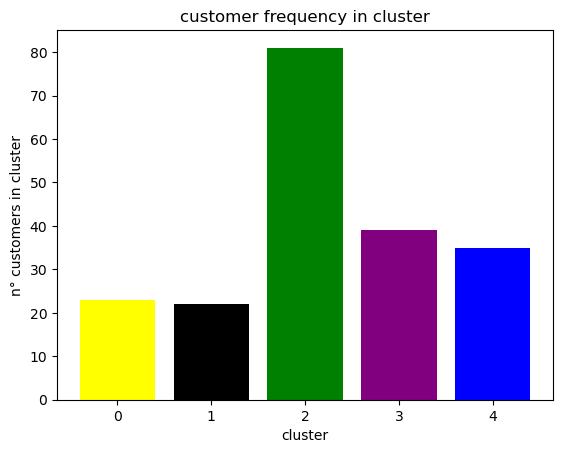

In [92]:
plt.bar(df1['cluster'].unique()[0],df1['cluster'].value_counts()[0],color='blue')
plt.bar(df1['cluster'].unique()[1],df1['cluster'].value_counts()[1],color='green')
plt.bar(df1['cluster'].unique()[2],df1['cluster'].value_counts()[2],color='black')
plt.bar(df1['cluster'].unique()[3],df1['cluster'].value_counts()[3],color='purple')
plt.bar(df1['cluster'].unique()[4],df1['cluster'].value_counts()[4],color='yellow')
plt.xlabel('cluster')
plt.ylabel('n° customers in cluster')
plt.title('customer frequency in cluster')

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
df_scaled = df
scaler = MinMaxScaler()
df_scaled["Annual Income (k$)"] = scaler.fit_transform(df_scaled[["Annual Income (k$)"]])
df_scaled['Spending Score (1-100)'] = scaler.fit_transform(df_scaled[['Spending Score (1-100)']])
df_scaled

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959
...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918
196,197,Female,45,0.909836,0.275510
197,198,Male,32,0.909836,0.744898
198,199,Male,32,1.000000,0.173469


In [48]:
y_predicted = km.fit_predict(df_scaled[["Spending Score (1-100)","Annual Income (k$)"]])
y_predicted

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [49]:
df1_scaled = df_scaled
df1_scaled['cluster'] = y_predicted
df1_scaled

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,3
1,2,Male,21,0.000000,0.816327,4
2,3,Female,20,0.008197,0.051020,3
3,4,Female,23,0.008197,0.775510,4
4,5,Female,31,0.016393,0.397959,3
...,...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918,2
196,197,Female,45,0.909836,0.275510,1
197,198,Male,32,0.909836,0.744898,2
198,199,Male,32,1.000000,0.173469,1


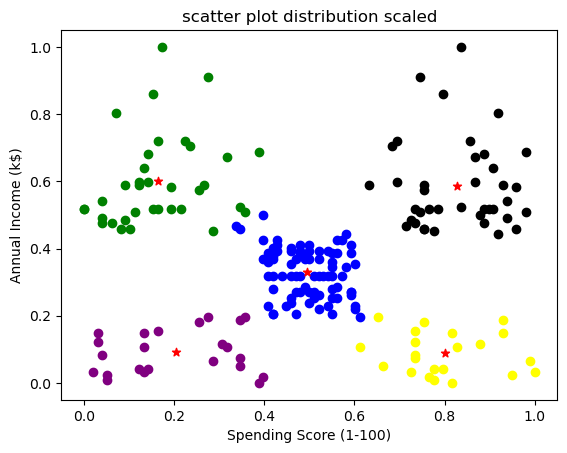

In [52]:
plt.scatter(df1_scaled[df1_scaled.cluster == 0]['Spending Score (1-100)'] , df1_scaled[df1_scaled.cluster == 0]['Annual Income (k$)'],color='blue')
plt.scatter(df1_scaled[df1_scaled.cluster == 1]['Spending Score (1-100)'] , df1_scaled[df1_scaled.cluster == 1]['Annual Income (k$)'],color='green')
plt.scatter(df1_scaled[df1_scaled.cluster == 2]['Spending Score (1-100)'] , df1_scaled[df1_scaled.cluster == 2]['Annual Income (k$)'],color='black')
plt.scatter(df1_scaled[df1_scaled.cluster == 3]['Spending Score (1-100)'] , df1_scaled[df1_scaled.cluster == 3]['Annual Income (k$)'],color='purple')
plt.scatter(df1_scaled[df1_scaled.cluster == 4]['Spending Score (1-100)'] , df1_scaled[df1_scaled.cluster == 4]['Annual Income (k$)'],color='yellow')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('scatter plot distribution scaled')
#plt.legend(["cluster 1", "cluster 2",'cluster 3','cluster 4','cluster 5'], loc="upper right")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red', marker='*', label = 'centroid')
plt.show()

The result of the analysis shows that there are 5 segments of customers and that there is potential for maximizing revenues targeting the black and green cluster: 

- Cluster 1 (yellow): These are low-income earning customers with high spending scores. I can assume that why this group of customers spend more at the retail store despite earning less is because they enjoy and are satisfied with the services rendered at the retail store.

- Cluster 2 (green): This group of customers have a higher income but they do not spend more at the store. One of the assumptions could be that they are not satisfied with the services rendered at the store. They are another ideal group to be targeted by the marketing team because they have the potential to bring in increased profit for the store.

- Cluster 3 (black): The customers in this group are high-income earners with high spending scores. They bring in profit. Discounts and other offers targeted at this group will increase their spending score and maximize profit.

- Cluster 4 (blue): These are average income earners with average spending scores. They are cautious with their spending at the store.

- Cluster 5 (purple): Low-income earners with a low spending score. This segment of people with low income will tend to purchase fewer items at the store.

In [54]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df_scaled[["Spending Score (1-100)","Annual Income (k$)"]])
    sse.append(km.inertia_)
sse

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[23.040720326039903,
 13.993505283127977,
 9.058985215159455,
 6.110312266413656,
 3.583117905952561,
 3.100666377684788,
 2.682840877112165,
 2.22017449982665,
 1.8812875828368871]

Text(0.5, 1.0, 'Elbow method')

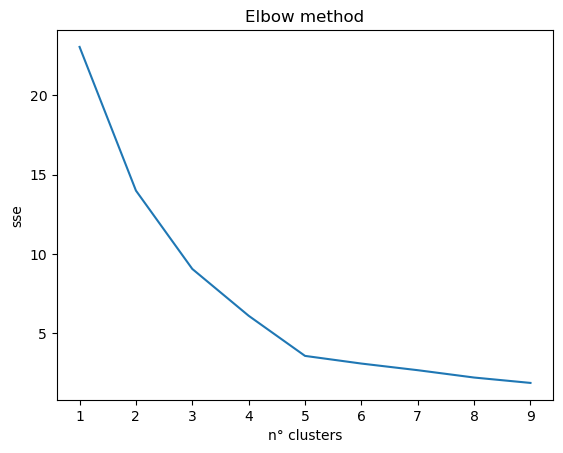

In [56]:
plt.xlabel('n° clusters')
plt.ylabel('sse')
plt.plot(k_range,sse)
plt.title('Elbow method')

In [57]:
#5 clusters was the correct choice

- Let's further analyse other features like age and genre

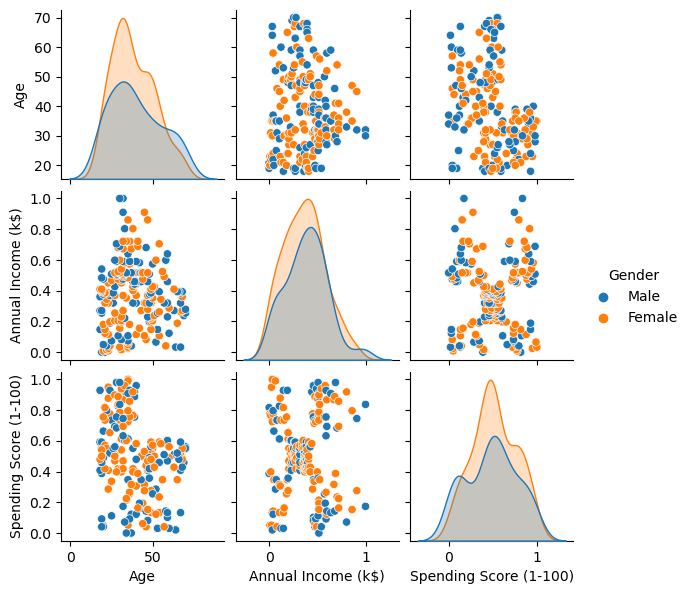

In [96]:
import seaborn as sns 
sns.pairplot(df.drop(['CustomerID','cluster'],axis=1),hue='Gender',height=2)
plt.show()

In [97]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

- It doesn´t seem like the gender impacts significantly in the spending score. The only thing is that there are more female customers than males, so maybe an option is to promote products that target that segment, integrating the knowledge gained through the clusters.

- For the case of the age, it seems that there are segmentation clusters. Let's apply kmeans cluster model

In [100]:
df_scaled['Age'] = scaler.fit_transform(df_scaled[['Age']])
df_scaled

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,0.000000,0.387755,3
1,2,Male,0.057692,0.000000,0.816327,4
2,3,Female,0.038462,0.008197,0.051020,3
3,4,Female,0.096154,0.008197,0.775510,4
4,5,Female,0.250000,0.016393,0.397959,3
...,...,...,...,...,...,...
195,196,Female,0.326923,0.860656,0.795918,2
196,197,Female,0.519231,0.909836,0.275510,1
197,198,Male,0.269231,0.909836,0.744898,2
198,199,Male,0.269231,1.000000,0.173469,1


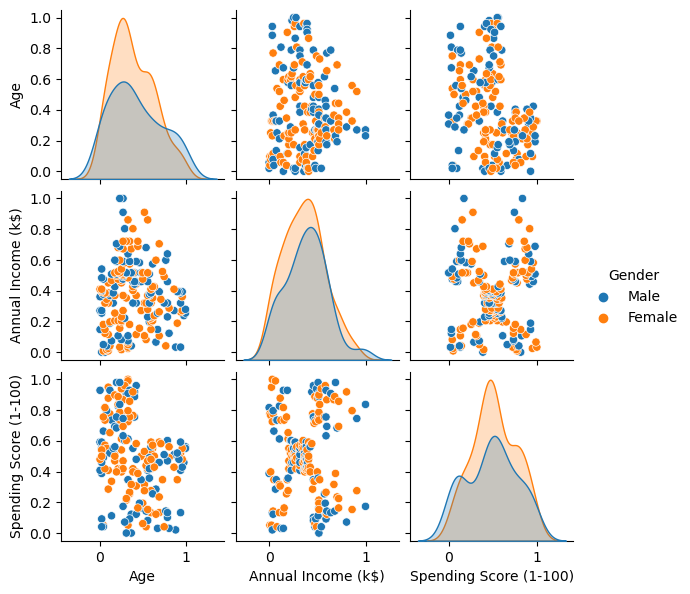

In [103]:
sns.pairplot(df_scaled.drop(['CustomerID','cluster'],axis=1),hue='Gender',height=2)
plt.show()

In [107]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df_scaled[["Spending Score (1-100)","Age"]])
    sse.append(km.inertia_)
sse

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[28.17833784431536,
 13.337690580804235,
 8.742042168276535,
 6.350246319122475,
 5.026143351352525,
 3.7561445337632238,
 3.259667999749735,
 2.7852028487331792,
 2.3940135842067987]

Text(0.5, 1.0, 'Elbow method')

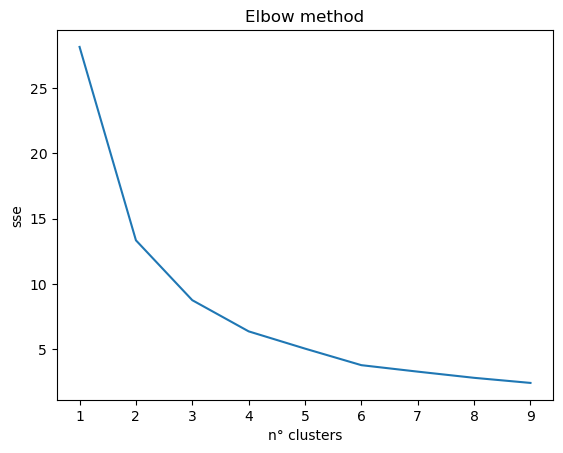

In [108]:
plt.xlabel('n° clusters')
plt.ylabel('sse')
plt.plot(k_range,sse)
plt.title('Elbow method')

In [110]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df_scaled[["Spending Score (1-100)","Age"]])
y_predicted

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 2, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 0, 1, 0, 1,
       3, 1, 0, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       1, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       2, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 2, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       2, 1])

In [115]:
df_scaled.drop(['cluster'],axis='columns')
df2 = df_scaled
df2['cluster'] = y_predicted
df2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,0.000000,0.387755,2
1,2,Male,0.057692,0.000000,0.816327,1
2,3,Female,0.038462,0.008197,0.051020,2
3,4,Female,0.096154,0.008197,0.775510,1
4,5,Female,0.250000,0.016393,0.397959,2
...,...,...,...,...,...,...
195,196,Female,0.326923,0.860656,0.795918,1
196,197,Female,0.519231,0.909836,0.275510,3
197,198,Male,0.269231,0.909836,0.744898,1
198,199,Male,0.269231,1.000000,0.173469,2


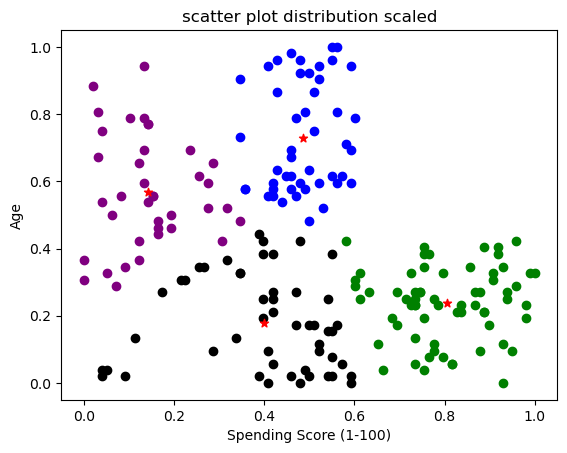

In [116]:
plt.scatter(df2[df1_scaled.cluster == 0]['Spending Score (1-100)'] , df2[df1_scaled.cluster == 0]['Age'],color='blue')
plt.scatter(df2[df1_scaled.cluster == 1]['Spending Score (1-100)'] , df2[df1_scaled.cluster == 1]['Age'],color='green')
plt.scatter(df2[df1_scaled.cluster == 2]['Spending Score (1-100)'] , df2[df1_scaled.cluster == 2]['Age'],color='black')
plt.scatter(df2[df1_scaled.cluster == 3]['Spending Score (1-100)'] , df2[df1_scaled.cluster == 3]['Age'],color='purple')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.title('scatter plot distribution scaled')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red', marker='*', label = 'centroid')
plt.show()

In [117]:
df.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

The result of the analysis shows that there are 4 segments of customers based in age:

- Cluster 1 (green): These are young customers that like to consume the services.

- Cluster 2 (black): These are young customers that maybe tries to save the money because they are student, and they look for a good service for the minimum amount of money.

- Cluster 3 (purple): these customers are more agely and conservative with their choices.

- Cluster 4 (blue): these customers are more agely and consumes the average.


- It could be wise to target the green cluster in order to maximize the revenues.